# **Palak** Bhawsar

# **B22CH018**

In [ ]:
# Mount Google Drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import scipy.signal
from google.colab import drive

# Function to read input signal from file
def read_signal(file_path):
    with open(file_path, 'r') as file:
        signal = [float(line.strip()) for line in file.readlines()]
    return signal

# Function to implement low-pass filter
def low_pass_filter(signal, cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    norm_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = scipy.signal.butter(4, norm_cutoff_freq, btype='low')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

# Function to implement high-pass filter
def high_pass_filter(signal, cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    norm_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = scipy.signal.butter(4, norm_cutoff_freq, btype='high')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

# Function to implement band-pass filter
def band_pass_filter(signal, low_cutoff_freq, high_cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    norm_low_cutoff_freq = low_cutoff_freq / nyquist_freq
    norm_high_cutoff_freq = high_cutoff_freq / nyquist_freq
    b, a = scipy.signal.butter(4, [norm_low_cutoff_freq, norm_high_cutoff_freq], btype='band')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

def perform_convolution(signal, kernel):
    convolved_signal = np.convolve(signal, kernel, mode='same')
    return convolved_signal


# Function to calculate correlation between two signals
def calculate_correlation(signal1, signal2):
    correlation = np.corrcoef(signal1, signal2)[0, 1]
    return correlation






In [ ]:
# File paths in your Google Drive
input_signal_path = '/content/INPUT-SIGNAL-X(t).txt'
output_signal_path = '/content/OUTPUT-SIGNAL-Y(t).txt'

# Load input and output signals
input_signal = read_signal(input_signal_path)
output_signal = read_signal(output_signal_path)

# Define the cutoff frequency and sampling frequency
cutoff_freq = 1000  # Replace with the actual cutoff frequency in Hz
sampling_freq = 5000  # Replace with the actual sampling frequency in Hz

# Filter input signal using low-pass filter
filtered_low_pass = low_pass_filter(input_signal, cutoff_freq, sampling_freq)

low_cutoff_freq = 100
high_cutoff_freq = 1000  # Replace with the actual high cutoff frequency in Hz

# Filter input signal using high-pass filter
filtered_high_pass = high_pass_filter(input_signal, cutoff_freq, sampling_freq)

# Filter input signal using band-pass filter
filtered_band_pass = band_pass_filter(input_signal, low_cutoff_freq, high_cutoff_freq, sampling_freq)

# Perform convolution between filtered signals and output signal
convolved_low_pass = perform_convolution(filtered_low_pass, output_signal)
convolved_high_pass = perform_convolution(filtered_high_pass, output_signal)
convolved_band_pass = perform_convolution(filtered_band_pass, output_signal)


# Calculate correlation between filtered signals and output signal
correlation_low_pass = calculate_correlation(filtered_low_pass, output_signal)
correlation_high_pass = calculate_correlation(filtered_high_pass, output_signal)
correlation_band_pass = calculate_correlation(filtered_band_pass, output_signal)

# Take absolute values of correlations
correlation_low_pass = abs(correlation_low_pass)
correlation_high_pass = abs(correlation_high_pass)
correlation_band_pass = abs(correlation_band_pass)

best_filter_array = [correlation_low_pass, correlation_high_pass, correlation_band_pass]
best_filter = np.argmax(best_filter_array)

# Print the result
if best_filter == 0:
    print("The best match is the Low Pass Filter.")
    print("Correlation is: ", best_filter_array[best_filter])
elif best_filter == 1:
    print("The best match is the High Pass Filter.")
    print("Correlation is: ", best_filter_array[best_filter])
else:
    print("The best match is the Band Pass Filter.")
    print("Correlation is: ", best_filter_array[best_filter])

The best match is the Low Pass Filter.
Correlation is:  0.2375853190512612


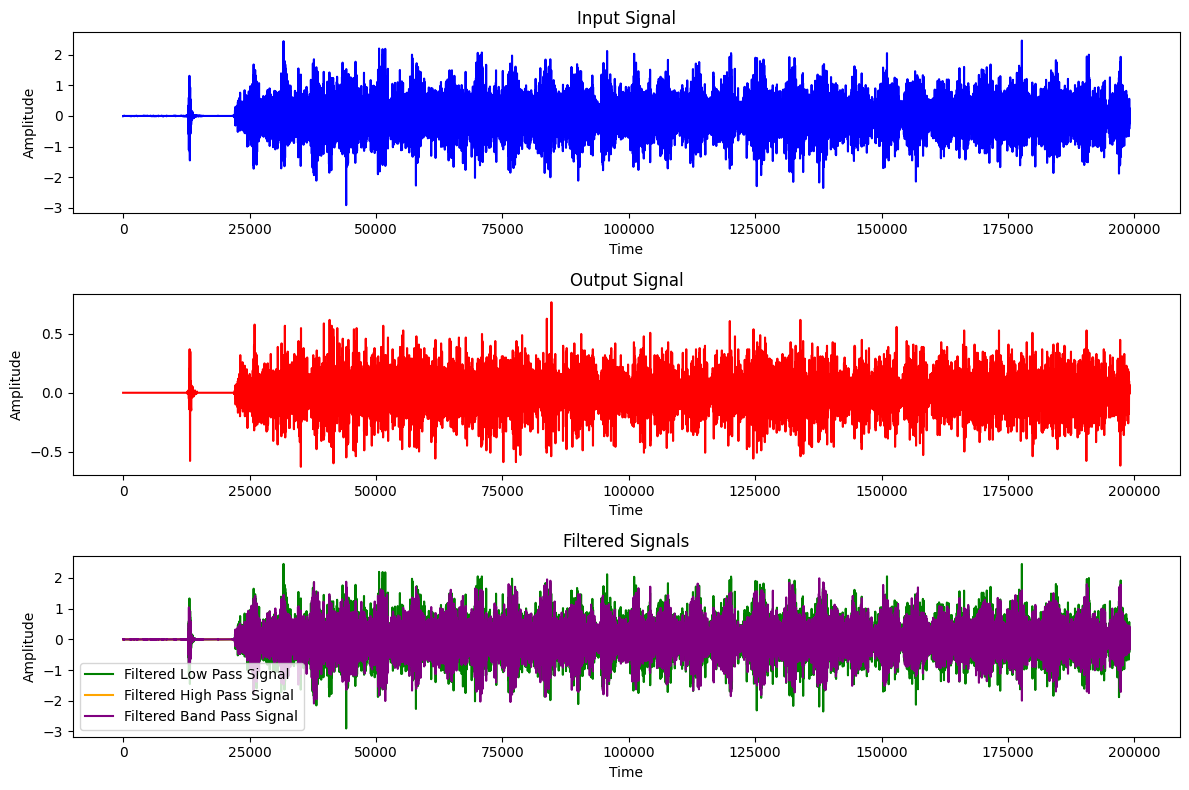

In [ ]:
import matplotlib.pyplot as plt

# Plot input signal, output signal, and filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(input_signal, color='blue', label='Input Signal (x(t))')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Input Signal')

plt.subplot(3, 1, 2)
plt.plot(output_signal, color='red', label='Output Signal (y(t))')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')

plt.subplot(3, 1, 3)
plt.plot(filtered_low_pass, color='green', label='Filtered Low Pass Signal')
plt.plot(filtered_high_pass, color='orange', label='Filtered High Pass Signal')
plt.plot(filtered_band_pass, color='purple', label='Filtered Band Pass Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Signals')
plt.legend()

plt.tight_layout()
plt.show()



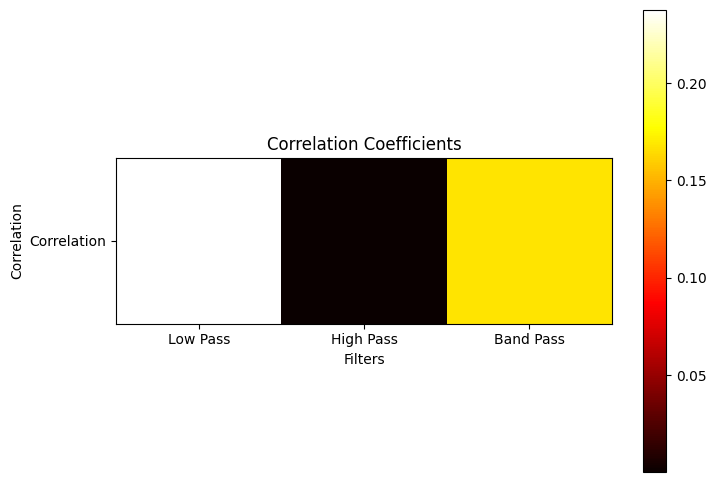

In [ ]:

# Create a heatmap to visualize correlation coefficients
correlation_matrix = np.array([[correlation_low_pass, correlation_high_pass, correlation_band_pass]])
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.title('Correlation Coefficients')
plt.xlabel('Filters')
plt.ylabel('Correlation')
plt.colorbar()
plt.xticks(np.arange(3), ['Low Pass', 'High Pass', 'Band Pass'])
plt.yticks([0], ['Correlation'])
plt.show()

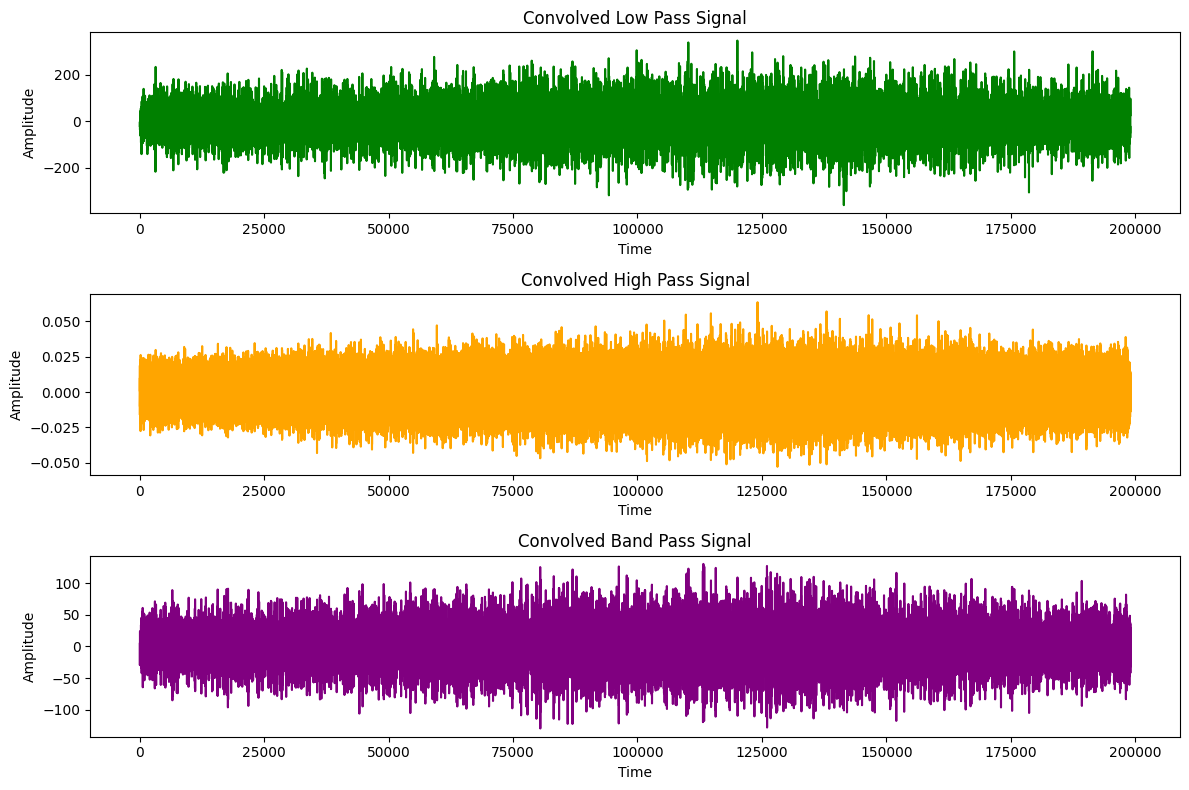

In [ ]:
# Plot filtered signals obtained through convolution
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(convolved_low_pass, color='green', label='Convolved Low Pass Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Convolved Low Pass Signal')

plt.subplot(3, 1, 2)
plt.plot(convolved_high_pass, color='orange', label='Convolved High Pass Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Convolved High Pass Signal')

plt.subplot(3, 1, 3)
plt.plot(convolved_band_pass, color='purple', label='Convolved Band Pass Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Convolved Band Pass Signal')

plt.tight_layout()
plt.show()



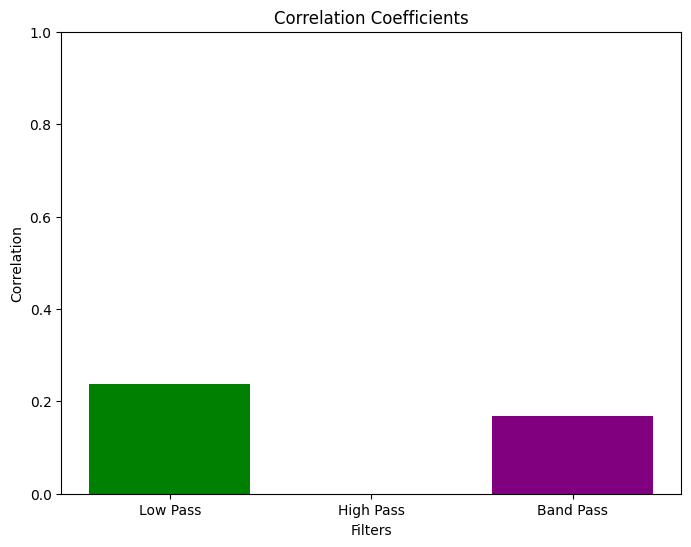

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize correlation coefficients
filters = ['Low Pass', 'High Pass', 'Band Pass']
correlation_values = [correlation_low_pass, correlation_high_pass, correlation_band_pass]

plt.figure(figsize=(8, 6))
plt.bar(filters, correlation_values, color=['green', 'orange', 'purple'])
plt.title('Correlation Coefficients')
plt.xlabel('Filters')
plt.ylabel('Correlation')
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.show()


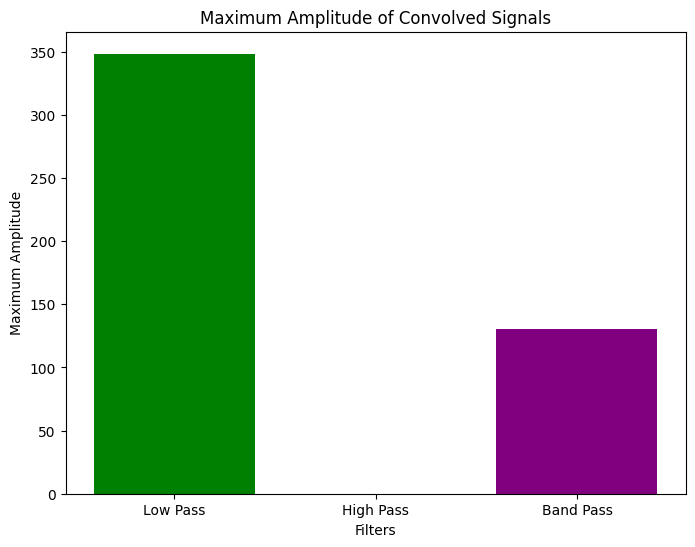

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize correlation coefficients for convolved signals
filters = ['Low Pass', 'High Pass', 'Band Pass']
convolution_values = [np.max(convolved_low_pass), np.max(convolved_high_pass), np.max(convolved_band_pass)]

plt.figure(figsize=(8, 6))
plt.bar(filters, convolution_values, color=['green', 'orange', 'purple'])
plt.title('Maximum Amplitude of Convolved Signals')
plt.xlabel('Filters')
plt.ylabel('Maximum Amplitude')
plt.show()
